In [1]:
import numpy as np

#sigmoid function
def sigmoid(n):
    return 1/(1+np.exp(-n)) 

i=np.array([[0, 0],[0, 1],[1, 0],[1, 1]]) #inputs for xor gate
o=np.array([[0],[1],[1],[0]]) #desired output of xor
l=0.1 #learning rate 

#random weights and bias
h_w=np.random.uniform(size=(2,2)) #hidden weights
h_b=np.random.uniform(size=(1,2)) #hidden bias
o_w=np.random.uniform(size=(2,1)) #output weights
o_b=np.random.uniform(size=(1,1)) #output bias

def xor_net(h_w,h_b,o_w,o_b):
    h_o = sigmoid(np.dot(i,h_w)+h_b)
    out = sigmoid(np.dot(h_o,o_w)+o_b)
    return out,h_o

out,h_o=xor_net(h_w,h_b,o_w,o_b)
out

array([[0.75939708],
       [0.77869726],
       [0.78930004],
       [0.80019189]])

In [2]:
def s(x):
  su=0
  for i in x:
    su=su+i**2
  return su

In [3]:
#derivative of sigmoid function
def d_sigmoid(n):
  return n*(1-n) 

index=[] 
error_sig=[]
#back propagation using sigmoid as activation function
for j in range(10000):
    index.append(j)
    error=(o-out)*2  #mse
    error_sig.append(s(error)) #to plot the error
    d_out=error*d_sigmoid(out)
    error_h=np.dot(d_out,o_w.T) #error for hidden layer
    d_h=error_h*d_sigmoid(h_o)   
    #updating weights and bias
    o_w=o_w+l*np.dot(h_o.T,d_out) #output weight
    h_w=h_w+l*np.dot(i.T,d_h) #hidden weight
    o_b=o_b+np.sum(d_out,axis=0)*l #output bias
    h_b=h_b+np.sum(d_h,axis=0)*l #hidden bias
    out,h_o=xor_net(h_w,h_b,o_w,o_b)

out
#final output 

array([[0.03280255],
       [0.97111351],
       [0.97110709],
       [0.03033132]])

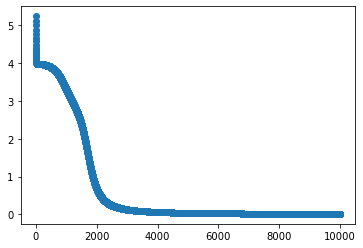

In [4]:
import matplotlib.pyplot as plt
plt.scatter(index,error_sig)

In [43]:
#Repeating the experiment by using tanh as activation function
#hyperbolic tangent function
def tan_h(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

In [44]:
#derivative of  hyperbolic tangent function
def d_tanh(x):
  return 1-(tan_h(x))**2

In [63]:
#initialising random weights and bias
h_w=np.random.uniform(size=(2,2)) #hidden weights
h_b=np.random.uniform(size=(1,2)) #hidden bias
o_w=np.random.uniform(size=(2,1)) #output weights
o_b=np.random.uniform(size=(1,1)) #output bias

def xor_net(h_w,h_b,o_w,o_b):
    h_o = tan_h(np.dot(i,h_w)+h_b)
    out = tan_h(np.dot(h_o,o_w)+o_b)
    return out,h_o

out,h_o=xor_net(h_w,h_b,o_w,o_b)

In [64]:
out

array([[0.64361682],
       [0.88192705],
       [0.84161218],
       [0.9039376 ]])

In [65]:
index=[] 
error_tanh=[]
#back propagation using hyperbolic tangent function
for j in range(10000):
    index.append(j)
    error=(o-out)*2  
    error_tanh.append(s(error)) 
    d_out=error*d_tanh(out)

    error_h=np.dot(d_out,o_w.T) #error for hidden layer
    d_h=error_h*d_tanh(h_o)
    
    #updating weights and bias
    o_w=o_w+l*np.dot(h_o.T,d_out) #output weight
    h_w=h_w+l*np.dot(i.T,d_h) #hidden weight
    o_b=o_b+np.sum(d_out,axis=0)*l #output bias
    h_b=h_b+np.sum(d_h,axis=0)*l #hidden bias
    out,h_o=xor_net(h_w,h_b,o_w,o_b)

out
#final output

array([[0.01250743],
       [0.99969486],
       [0.99969487],
       [0.01450044]])

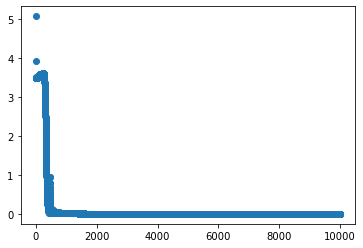

In [66]:
import matplotlib.pyplot as plt
plt.scatter(index,error_tanh)

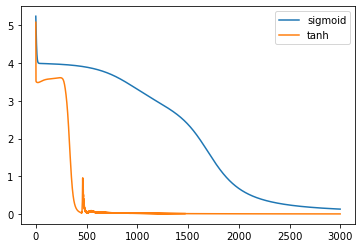

In [67]:
#comparing error for backpropagation using sigmoid and tanh function 
plt.plot(index[:3000],error_sig[:3000],label="sigmoid")
plt.plot(index[:3000],error_tanh[:3000],label="tanh")
plt.legend()
plt.show()